# Temperature Forecast Project using ML
Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


In [71]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
data=pd.read_csv('temperature.csv')
data.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


Target variables have continuous data.I could use a regression model to approach this.  

In [73]:
data.shape

(7752, 25)

In [74]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [75]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Date is the only column that isn't float64

In [76]:
#Checking number of unique values 
data.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [77]:
#checking null values
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [78]:
data.shape

(7752, 25)

In [79]:
#Dropping null values
data.dropna(inplace=True)

In [80]:
data.shape

(7588, 25)

In [81]:
DataLoss=((7752-7588)/7752)*100
DataLoss

2.1155830753353975

2% data loss from null values. This is fine. 

In [82]:
data.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

No more null values

In [83]:
#descriptive statistic analysis
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


LDAPS_PPT2, 3 and 4 have min, median and 75% of 0 but a max which is significantly higher. 

In [84]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

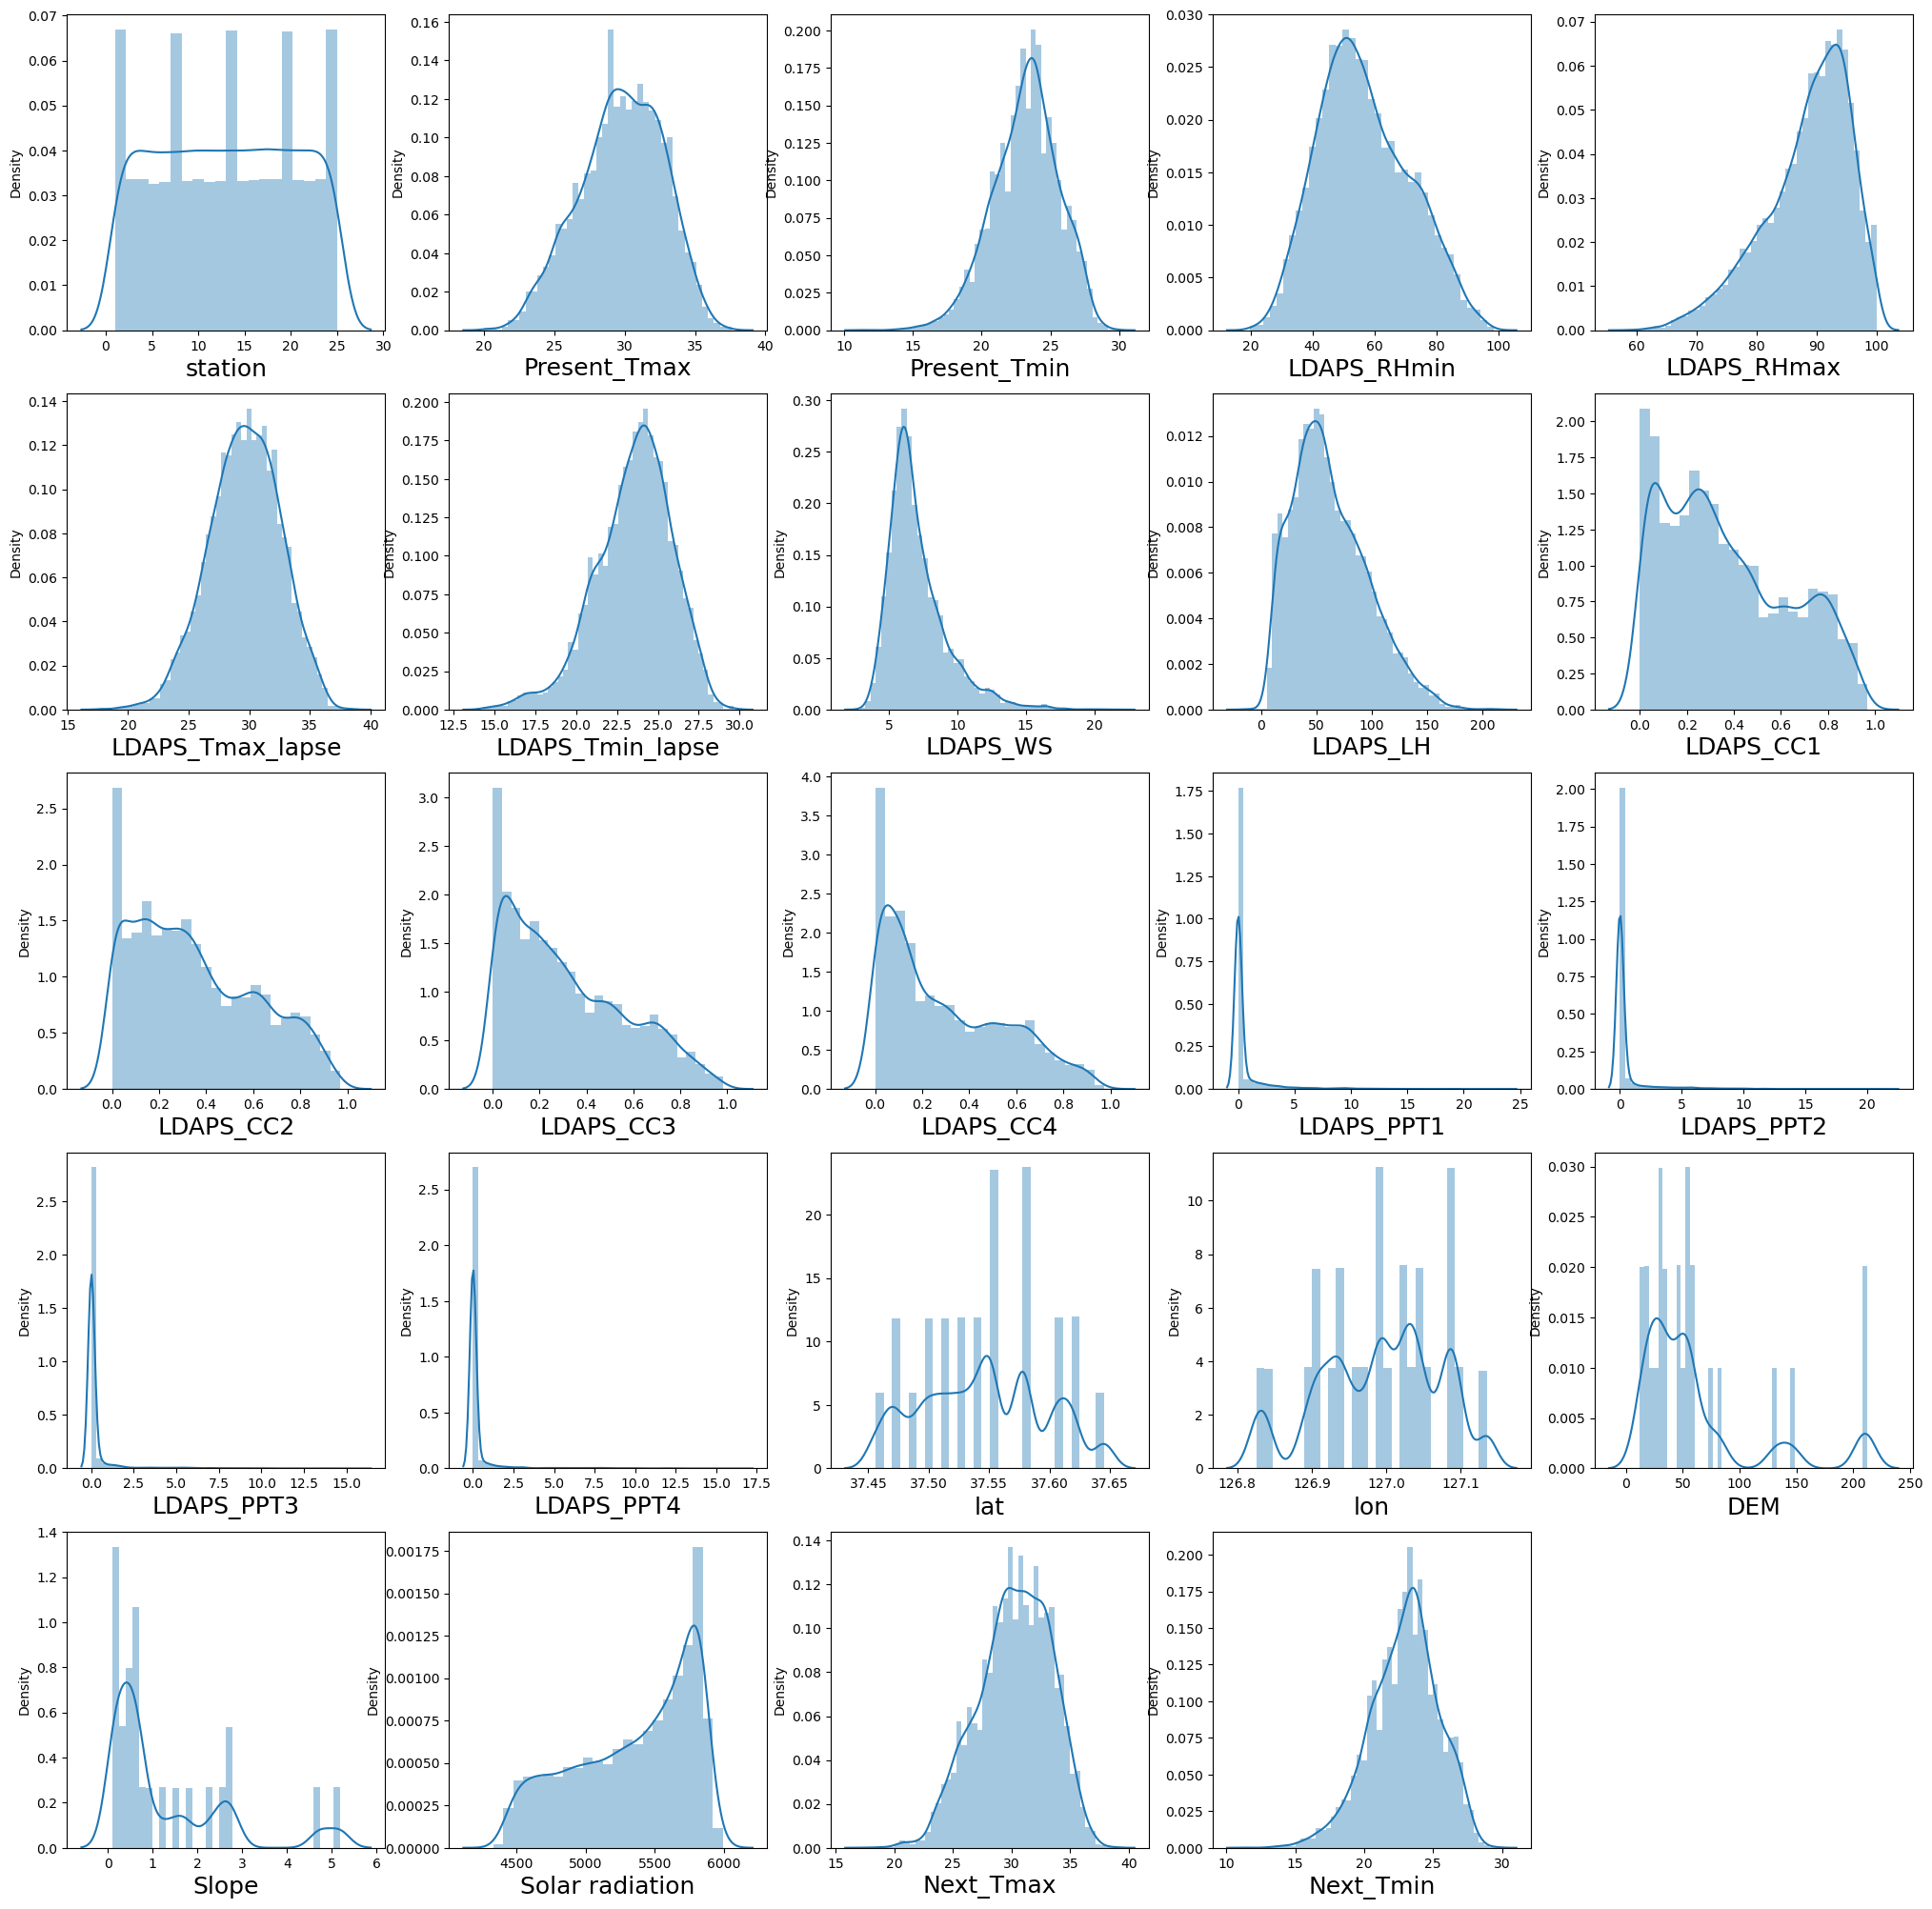

In [85]:
#Use distplots to check distribution of the numerical data
columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 25:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

There is examples of left skew in all LDAPS columns, DEM, slope and right skew in solar radiation and Next_Tmin. I will use power transformer to deal with this later. 

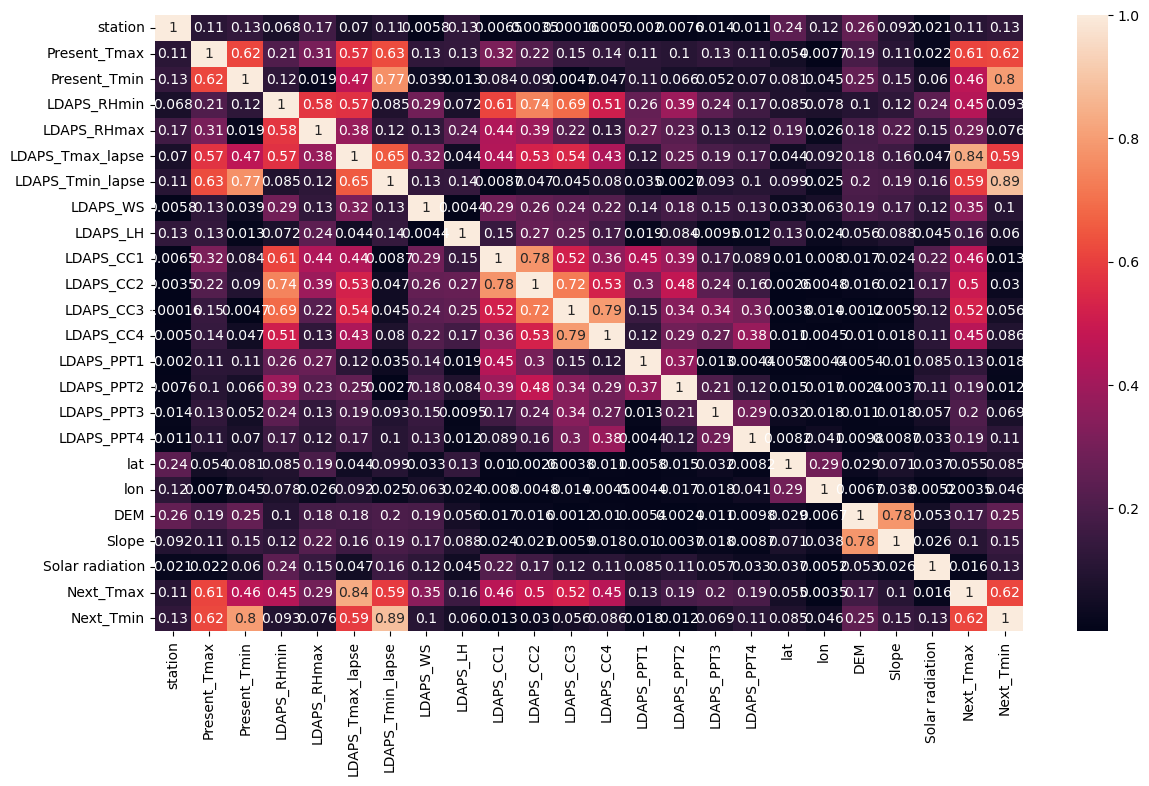

In [86]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

I can see some strong correlation between present_tmax and present_tmin with both targets (unsurprisingly). I can also see that LDPAS lapse is highly correlated. Slope and DEM are correlated as well as the LDPAS CC's with each other.   

In [87]:
#Exploring the positive and negative correlation of features 
data.corr()['Next_Tmax'].sort_values()

LDAPS_CC3          -0.523061
LDAPS_CC2          -0.498295
LDAPS_CC1          -0.459705
LDAPS_CC4          -0.454039
LDAPS_RHmin        -0.446824
LDAPS_WS           -0.351107
LDAPS_RHmax        -0.289788
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
LDAPS_PPT2         -0.186722
DEM                -0.174578
LDAPS_PPT1         -0.125954
Slope              -0.104279
lat                -0.055367
lon                 0.003502
Solar radiation     0.016145
station             0.107747
LDAPS_LH            0.156779
Present_Tmin        0.463523
LDAPS_Tmin_lapse    0.592119
Present_Tmax        0.610357
Next_Tmin           0.616629
LDAPS_Tmax_lapse    0.835729
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

Lots of values negatively correlated with the target. LDAPS CC3 has the highest, negative correlation and CC2, CC1 and CC4 are also higly correlated negatively. LDAPS Tmax lapse and next tmin are the highest positive correlated features.

In [88]:
#Exploring the positive and negative correlation of features 
data.corr()['Next_Tmin'].sort_values()

DEM                -0.249303
Slope              -0.148379
LDAPS_PPT4         -0.114900
LDAPS_WS           -0.102021
LDAPS_CC4          -0.086197
lat                -0.085136
LDAPS_RHmax        -0.076415
LDAPS_PPT3         -0.068664
LDAPS_LH           -0.060392
LDAPS_CC3          -0.056490
lon                -0.045758
LDAPS_CC1          -0.012877
LDAPS_PPT2         -0.012462
LDAPS_PPT1          0.018031
LDAPS_CC2           0.030358
LDAPS_RHmin         0.093249
Solar radiation     0.125517
station             0.128184
LDAPS_Tmax_lapse    0.589963
Next_Tmax           0.616629
Present_Tmax        0.621048
Present_Tmin        0.796975
LDAPS_Tmin_lapse    0.886513
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

Similarly, there is lots of negative correlation with the target. DEM has the highest, negative correlation whereas present tmin and LDAPS tmin lapse have the highest correlation. 

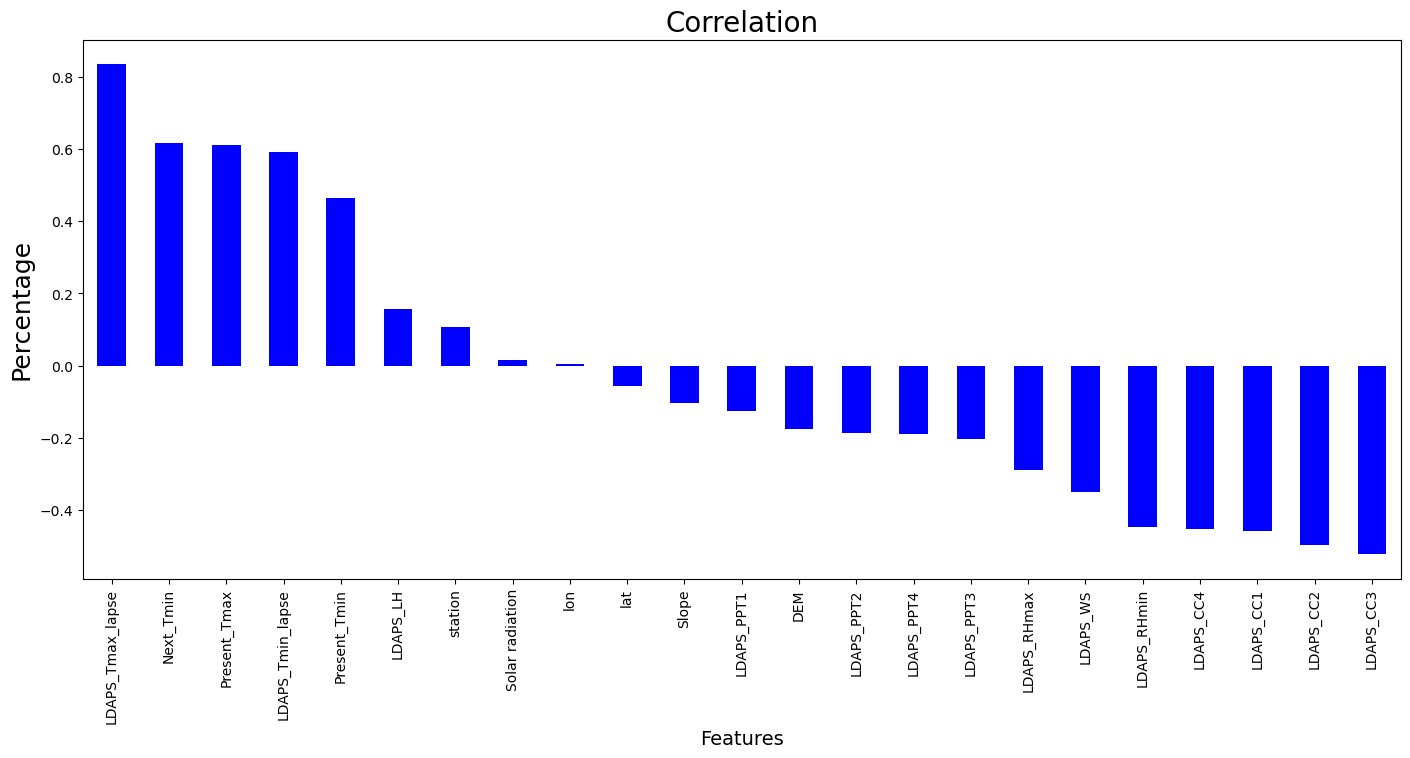

In [89]:
#explore correlation visually 
plt.figure(figsize=(17,7))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='Blue')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Percentage',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

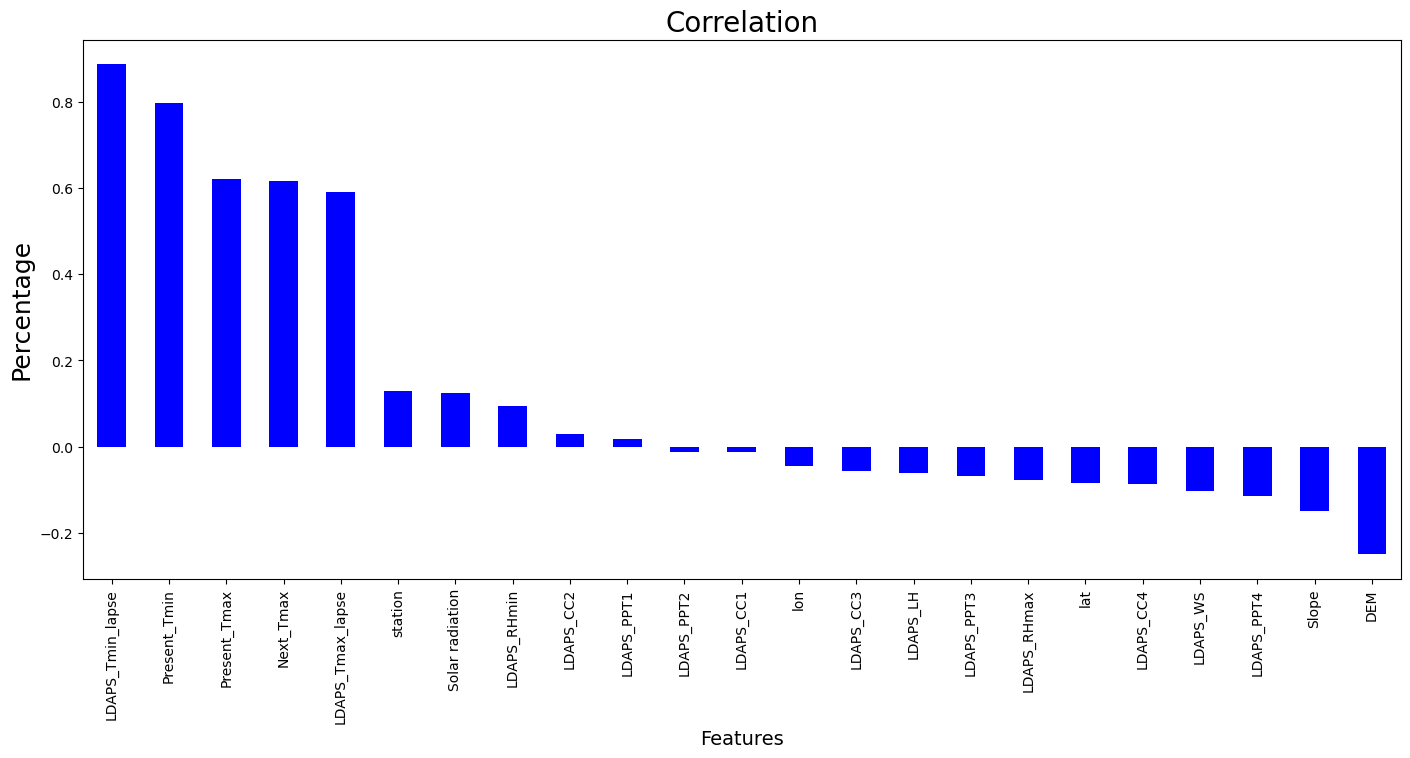

In [90]:
#explore correlation visually 
plt.figure(figsize=(17,7))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='Blue')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Percentage',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

When comparing the two graphs, it is clear that there is a higher negative correlation between features and Next_Tmax

I will not be removing columns yet though, as I believe they are still relevant to target.

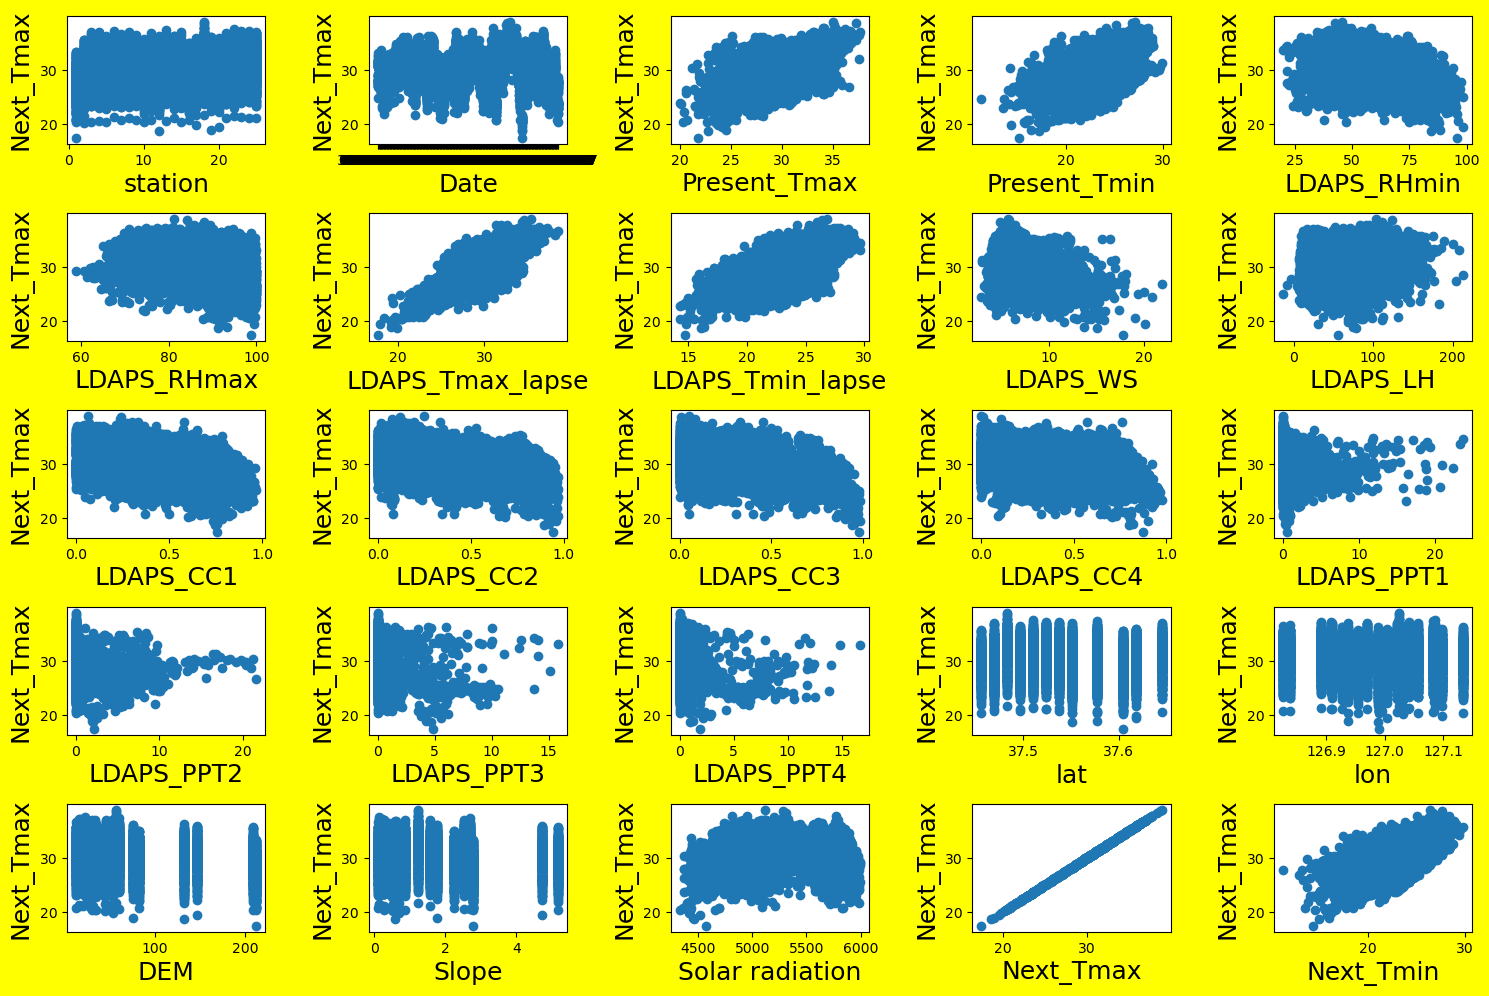

In [91]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber <=25:
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter (data[column], data['Next_Tmax'])
        plt.xlabel(column, fontsize=18)
        plt.ylabel ('Next_Tmax', fontsize=18)
        plotnumber +=1
        plt.tight_layout()

There are some linear relationships between features and target, such as Present_Tmax, Present_Tmin.

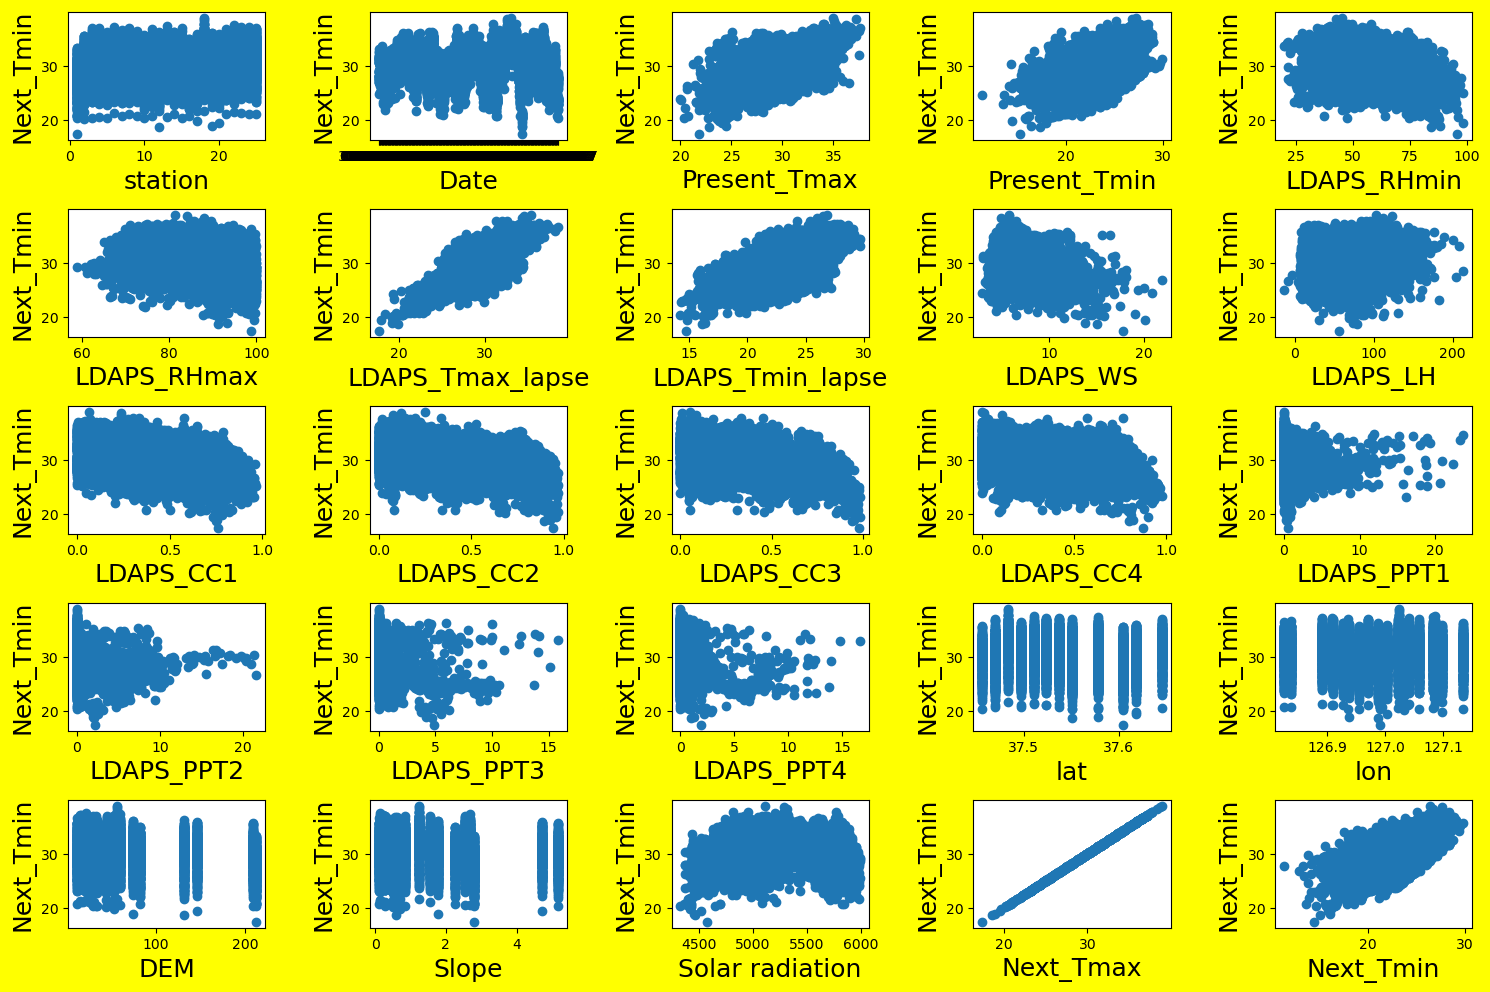

In [92]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber <=25:
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter (data[column], data['Next_Tmax'])
        plt.xlabel(column, fontsize=18)
        plt.ylabel ('Next_Tmin', fontsize=18)
        plotnumber +=1
        plt.tight_layout()

There are some linear relationships between features and target, such as Present_Tmax, Present_Tmin.

station                AxesSubplot(0.125,0.786098;0.168478x0.0939024)
Present_Tmax        AxesSubplot(0.327174,0.786098;0.168478x0.0939024)
Present_Tmin        AxesSubplot(0.529348,0.786098;0.168478x0.0939024)
LDAPS_RHmin         AxesSubplot(0.731522,0.786098;0.168478x0.0939024)
LDAPS_RHmax            AxesSubplot(0.125,0.673415;0.168478x0.0939024)
LDAPS_Tmax_lapse    AxesSubplot(0.327174,0.673415;0.168478x0.0939024)
LDAPS_Tmin_lapse    AxesSubplot(0.529348,0.673415;0.168478x0.0939024)
LDAPS_WS            AxesSubplot(0.731522,0.673415;0.168478x0.0939024)
LDAPS_LH               AxesSubplot(0.125,0.560732;0.168478x0.0939024)
LDAPS_CC1           AxesSubplot(0.327174,0.560732;0.168478x0.0939024)
LDAPS_CC2           AxesSubplot(0.529348,0.560732;0.168478x0.0939024)
LDAPS_CC3           AxesSubplot(0.731522,0.560732;0.168478x0.0939024)
LDAPS_CC4              AxesSubplot(0.125,0.448049;0.168478x0.0939024)
LDAPS_PPT1          AxesSubplot(0.327174,0.448049;0.168478x0.0939024)
LDAPS_PPT2          

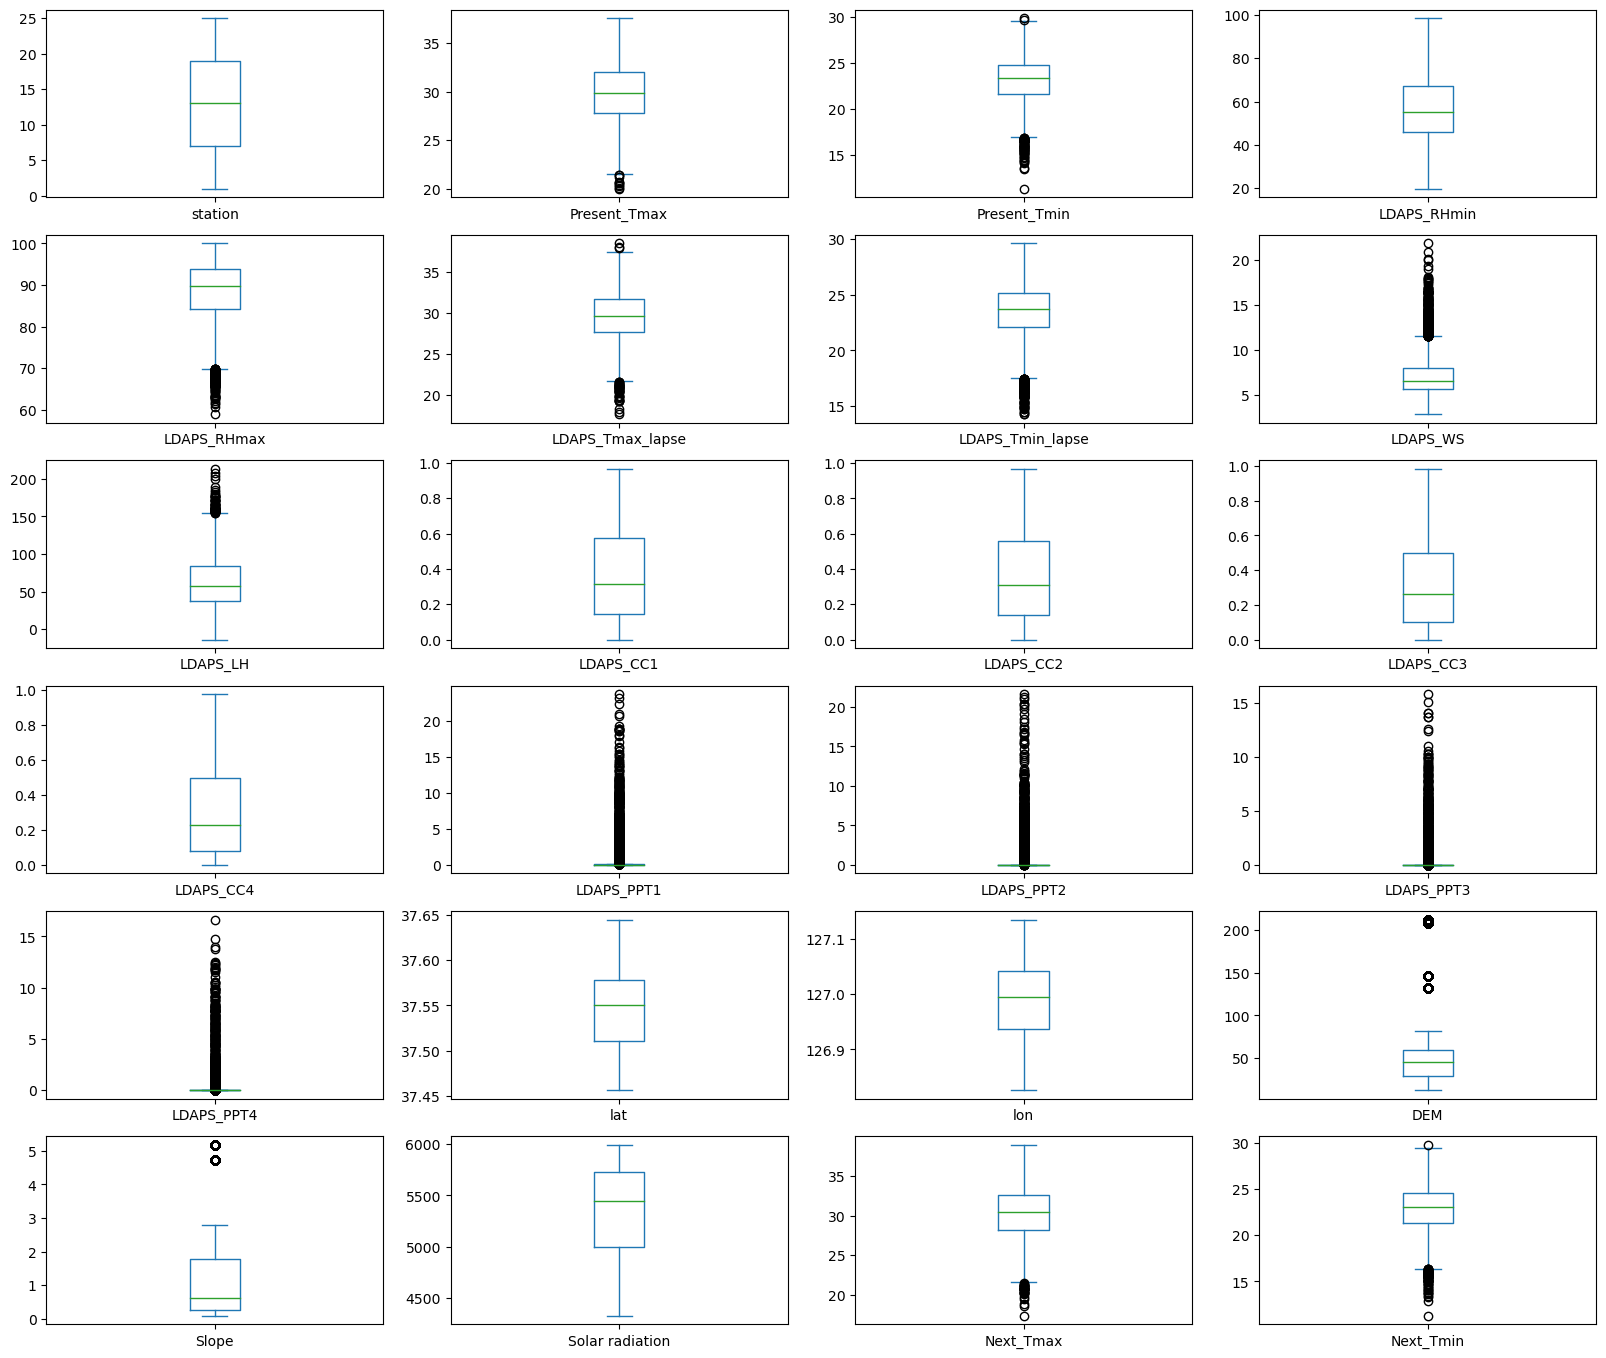

In [93]:
#Exploring outliers
data.plot(kind='box',subplots=True,layout=(7,4),figsize=(20,20))

Considerable outliers present in most features. I will use zscore to reduce this. 

In [94]:
#Using Zscore to remove outliers
data.shape

(7588, 25)

In [95]:
#Dropping date as it has no bearing on the target and is object type
data.drop(columns=["Date"], axis=1, inplace=True)

In [96]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))

In [97]:
#Removing outliers
outliers = np.where(z > threshold)
outlier_rows = outliers[0]
data_new = data.drop(index=data.index[outlier_rows])

In [98]:
data_new.shape

(6739, 24)

In [99]:
Dataloss=((7588-6739)/7588)*100
Dataloss

11.188719030047443

11% data loss as a result of zscore method

In [100]:
data_new.skew().sort_values()

LDAPS_RHmax        -0.686083
Solar radiation    -0.520157
LDAPS_Tmin_lapse   -0.379269
lon                -0.277547
Present_Tmax       -0.269936
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Present_Tmin       -0.221250
LDAPS_Tmax_lapse   -0.110563
station            -0.001594
lat                 0.106983
LDAPS_RHmin         0.309567
LDAPS_CC2           0.505774
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_WS            1.085685
Slope               1.590130
DEM                 1.764698
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
dtype: float64

In [101]:
#removing skewness with power transformer/ yeojohnson
data_new.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [102]:
#Using Yeojohnson to deal with skewness
from sklearn.preprocessing import PowerTransformer

columns_to_transform=['LDAPS_RHmax', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope',
       'Solar radiation']          
PT = PowerTransformer(method='yeo-johnson')

data_new[columns_to_transform] = PT.fit_transform(data_new[columns_to_transform])


In [103]:
data_new.skew().sort_values()

LDAPS_Tmin_lapse   -0.379269
lon                -0.277547
Present_Tmax       -0.269936
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Present_Tmin       -0.221250
Solar radiation    -0.172156
LDAPS_Tmax_lapse   -0.110563
LDAPS_RHmax        -0.103320
LDAPS_LH           -0.030736
station            -0.001594
LDAPS_WS            0.007615
DEM                 0.038830
LDAPS_CC2           0.050023
LDAPS_CC1           0.065308
LDAPS_CC3           0.094449
lat                 0.106983
LDAPS_CC4           0.142061
Slope               0.233799
LDAPS_RHmin         0.309567
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
dtype: float64

Skew has been reduced

In [104]:
#Seperate into dependent and independent variables
x=data_new.drop (columns=['Next_Tmax', 'Next_Tmin'], axis=1)
y_max=data_new['Next_Tmax']
y_min=data_new['Next_Tmin']

In [105]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_new)
x_scaled

array([[-1.67271855, -0.42570408, -0.81445954, ...,  1.89168677,
        -0.48995143, -0.79058687],
       [-1.5339585 ,  0.69021541, -0.72778535, ...,  1.43107721,
        -0.0111348 , -0.23915062],
       [-1.39519845,  0.58559796,  0.00894523, ...,  1.4105105 ,
         0.19407233,  0.35470379],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ..., -1.77939372,
        -0.76356093, -2.10555022],
       [ 1.51876264, -2.30881822, -2.41793199, ..., -1.78544584,
        -0.66095736, -1.80862301],
       [ 1.65752269, -2.3436907 , -2.54794327, ..., -1.76949992,
        -0.93456687, -2.40247743]])

In [106]:
# Split data into Xtrain/test and ytrain/test
from sklearn.model_selection import train_test_split

x_train, x_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(x, y_min, y_max, test_size=0.2, random_state=3)


In [107]:
#import libraries for ML training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_min_train,cv=5)
print(cv)
print(cv.mean())

[0.80879413 0.8306962  0.81959413 0.82478131 0.82358174]
0.8214895019063227


In [108]:
lr.fit(x_train, y_min_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

r2_train = r2_score(y_min_train, pred_train)
r2_test = r2_score(y_min_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.8235571123714044
R-squared Test: 0.8184112320075677


Promising scores for linear regression

In [109]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
cv = cross_val_score(dt,x_train,y_min_train,cv=5)
print(cv)
print(cv.mean())

[0.74889739 0.75033436 0.75627163 0.76971419 0.78196867]
0.7614372475788483


In [110]:
dt.fit(x_train, y_min_train)
pred_train = dt.predict(x_train)
pred_test = dt.predict(x_test)

r2_train = r2_score(y_min_train, pred_train)
r2_test = r2_score(y_min_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 1.0
R-squared Test: 0.7755924010276617


Not too bad, but not as good as linear regression and signs of overfitting in this model 

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf,x_train,y_min_train,cv=5)
print(cv)
print(cv.mean())

[0.88770543 0.8860766  0.89593135 0.8945795  0.89294879]
0.8914483349421735


In [112]:
rf.fit(x_train, y_min_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)

r2_train = r2_score(y_min_train, pred_train)
r2_test = r2_score(y_min_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.9855278645086994
R-squared Test: 0.8944388815696948


Very happy with random forest. Will explore best parameters to improve the score further.

In [113]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [114]:
#Using gridsearch to find best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_min_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_model = grid_search.best_estimator_

y_min_pred = best_rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

KeyboardInterrupt: 

In [115]:
rf=RandomForestRegressor(max_depth=20, min_samples_leaf=4,min_samples_split=10, n_estimators=50, bootstrap=True)
rf.fit(x_train,y_min_train)
rf_score_training = rf.score(x_train,y_min_train)
pred_rf=rf.predict(x_test)
rf_score_training*100

96.12992510974176

In [116]:
import pickle
filename= 'weather_Tmin.pkl'
pickle.dump(rf, open(filename,'wb'))
loaded_model= pickle.load(open('weather_Tmin.pkl', 'rb'))

In [117]:
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_max_train,cv=5)
print(cv)
print(cv.mean())

[0.75052179 0.75773447 0.78191707 0.74956995 0.7608402 ]
0.7601166962925537


In [118]:
lr.fit(x_train, y_max_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

r2_train = r2_score(y_max_train, pred_train)
r2_test = r2_score(y_max_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.7629378982474618
R-squared Test: 0.7541358888850844


In [119]:
dt=DecisionTreeRegressor()
cv = cross_val_score(dt,x_train,y_max_train,cv=5)
print(cv)
print(cv.mean())

[0.74360014 0.70207423 0.74724707 0.71695805 0.70361945]
0.7226997869747527


In [120]:
dt.fit(x_train, y_max_train)
pred_train = dt.predict(x_train)
pred_test = dt.predict(x_test)

r2_train = r2_score(y_max_train, pred_train)
r2_test = r2_score(y_max_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)

R-squared Train: 1.0
R-squared Test: 0.7549347084147102


In [121]:
rf = RandomForestRegressor()
cv = cross_val_score(rf,x_train,y_max_train,cv=5)
print(cv)
print(cv.mean())

[0.87276472 0.87137575 0.88422627 0.87109883 0.86740582]
0.8733742772678991


In [122]:
rf.fit(x_train, y_max_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)

r2_train = r2_score(y_max_train, pred_train)
r2_test = r2_score(y_max_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.9831989170537624
R-squared Test: 0.8872801249707968


In [123]:
rf=RandomForestRegressor(max_depth=20, min_samples_leaf=4,min_samples_split=10, n_estimators=50, bootstrap=True)
rf.fit(x_train,y_min_train)
rf_score_training = rf.score(x_train,y_min_train)
pred_rf=rf.predict(x_test)
rf_score_training*100

96.14100988491204

In [124]:
import pickle
filename= 'weather_Tmax.pkl'
pickle.dump(rf, open(filename,'wb'))
loaded_model= pickle.load(open('weather_Tmax.pkl', 'rb'))

In [128]:
compare={"Actual": y_min_test, "Predict": pred_test}
pd.DataFrame(compare)

,Actual,Predict
2284,23.0,30.640
7398,22.2,29.065
5060,20.3,24.254
458,22.7,30.839
477,24.4,30.728
...,...,...
6736,25.6,30.707
254,24.2,25.921
4641,17.6,30.913
5174,25.7,33.496


In [129]:
compare={"Actual": y_max_test, "Predict": pred_test}
pd.DataFrame(compare)

,Actual,Predict
2284,32.3,30.640
7398,29.0,29.065
5060,23.4,24.254
458,31.3,30.839
477,30.8,30.728
...,...,...
6736,33.0,30.707
254,25.6,25.921
4641,31.0,30.913
5174,33.6,33.496
